# Ejercicio 5

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import cv2 as cv

In [5]:
def plot_comparison(imgs, titles):
    N = len(imgs)

    fig, ax = plt.subplots(1, N, figsize=(N*5, 8))    
    for k in range(N):
        ax[k].imshow(imgs[k], cmap='gray')
        ax[k].axis('off')
        ax[k].set_title(titles[k], fontsize=15)
    plt.show()

## Item c - Top-Hat Transform


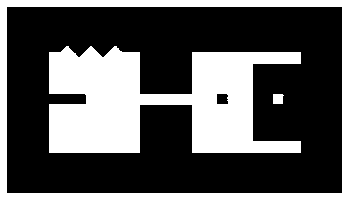

In [14]:
img = cv.imread('../resources/fig-ex5c-2.jpg', cv.IMREAD_GRAYSCALE) / 255

img = (img >= 0.5).astype(np.uint8)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

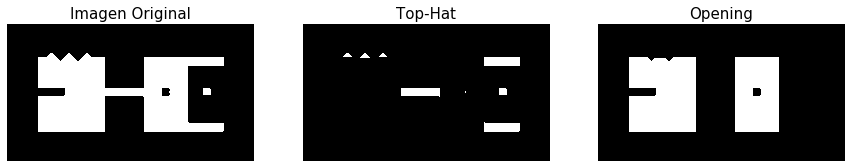

In [21]:
kernel = np.ones((35, 35), dtype=np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plot_comparison([img, tophat, opening], ['Imagen Original', 'Top-Hat', 'Opening'])

La transformación Top-Hat es la diferencia entre la imagen original y la operación de apertura. Por lo tanto, nos muestra qué pixeles blancos son removidos por la operación de apertura, como se muestra en la comparación.

## Item d - Hit and Miss

La transformación hit and miss se usa para buscar patrones particulares en los pixeles de una imágen. 
Por ejemplo es muy utilizada para obtener las esquinas en una imágen aplicando un kernel como el siguiente:

<img src="../resources/ex5_d_kernel.png" />

Luego este mismo kernel se lo rota 90 grados tres veces para obtener cuatro kernels distintos, uno para cada esquina. Se translada el kernel a cada pixel de la imagen original y se compara para ver si coinciden completamente. Cuando coincide se setea ese pixel como 1 y sino como 0. Luego se aplcia la intersección entre el resultado obtenido para cada uno de los kernels y se obtiene el resultado final.
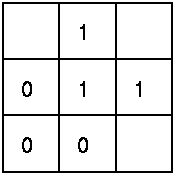